In [58]:
import numpy as np
from numpy.random import random as rng
import matplotlib.pyplot as plt

# Stochastic Simulations in Physics

This notebook explores three fundamental concepts in physics and dynamical systems:
1. **Nuclear Decay** - Radioactive decay as a stochastic process
2. **Altered Nuclear Decay** - Modified decay with interaction effects
3. **Logistic Map** - Chaos and bifurcation in nonlinear dynamics

## Part 1: Nuclear Decay

### Theoretical Background

Radioactive decay is a probabilistic process where unstable atomic nuclei lose energy by emitting radiation.
The fundamental law of radioactive decay states that the rate of decay is proportional to the number of
undecayed nuclei present:

$$\frac{dN}{dt} = -\lambda N$$

where:
- $N(t)$ is the number of undecayed nuclei at time $t$
- $\lambda$ is the decay constant (probability of decay per unit time)
- The negative sign indicates that $N$ decreases with time

### Analytical Solution

Solving this differential equation gives us the exponential decay law:

$$N(t) = N_0 e^{-\lambda t}$$

where $N_0$ is the initial number of nuclei.

### Stochastic Simulation Approach

In our simulation, we model each nucleus individually. At each time step $\Delta t$:
- Each nucleus has a probability $p = \lambda \Delta t$ of decaying
- We use random numbers to determine which nuclei decay
- This Monte Carlo approach naturally captures the statistical fluctuations in real decay processes


In [68]:
# Nuclear Decay Parameters
N0 = 10000  # Initial number of nuclei
lam = 0.5  # Decay constant (1/time units)
dt = 0.05  # Time step for simulation
Tdt = 300  # Number of time steps
M = 100  # Number of independent simulations (ensemble size)

# The half-life is τ₁/₂ = ln(2)/λ ≈ 0.693 time units

# Initialize array to store results
# A[i,j] = number of undecayed nuclei in simulation i at time step j
A = np.zeros((M, Tdt), dtype=np.int16)

# Set initial condition: all simulations start with N0 nuclei
for i in range(M):
    A[i][0] = N0

In [69]:
A

array([[10000,     0,     0, ...,     0,     0,     0],
       [10000,     0,     0, ...,     0,     0,     0],
       [10000,     0,     0, ...,     0,     0,     0],
       ...,
       [10000,     0,     0, ...,     0,     0,     0],
       [10000,     0,     0, ...,     0,     0,     0],
       [10000,     0,     0, ...,     0,     0,     0]],
      shape=(100, 300), dtype=int16)

## Running the Stochastic Simulation

For each simulation run:
1. At each time step, we check each remaining nucleus
2. Each nucleus has probability $p = \lambda \Delta t$ of decaying
3. We count how many decay and subtract from the total

This process naturally produces:
- **Poisson statistics** for the number of decay events
- **Statistical fluctuations** that decrease relatively as $N$ increases
- An **ensemble average** that approaches the theoretical exponential decay

In [70]:
# Run the stochastic simulation
for i in range(M):
    for j in range(1, Tdt):
        decayed = 0
        # Check each remaining nucleus
        for k in range(A[i][j - 1]):
            if rng() < dt * lam:  # Probability of decay in time dt
                decayed += 1
        A[i][j] = A[i][j - 1] - decayed

# Time array for plotting
t = np.arange(0, Tdt * dt, dt)

# Calculate ensemble average and standard deviation
mean_N = np.mean(A, axis=0)
std_N = np.std(A, axis=0)

# Theoretical prediction
N_theory = N0 * np.exp(-lam * t)

### Visualization: Comparing Stochastic Simulations with Theory

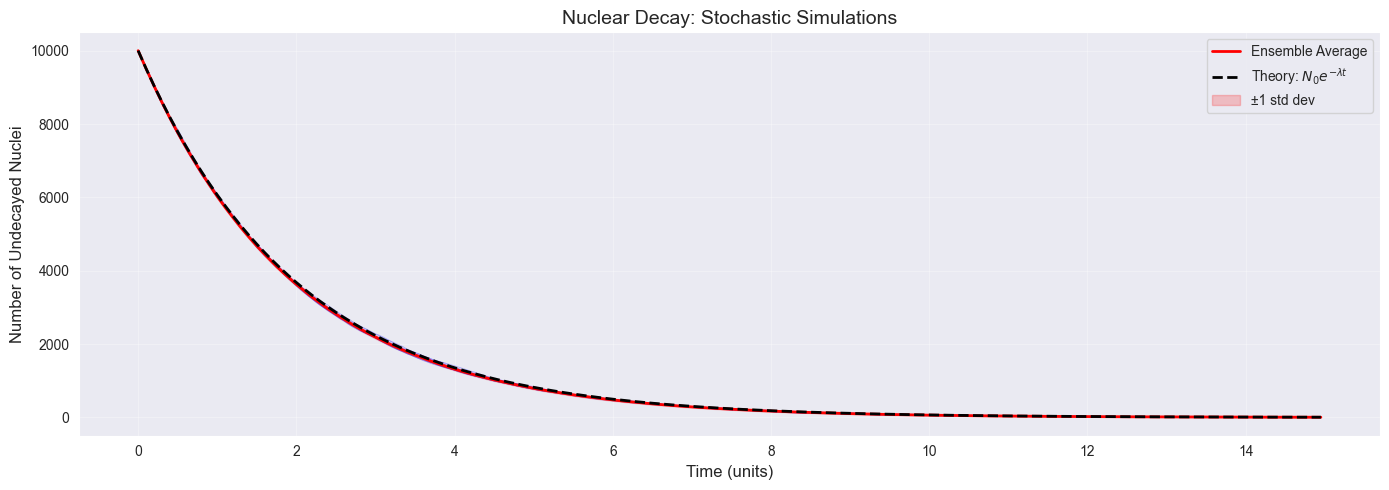

Initial number of nuclei: 10000
Decay constant λ: 0.5
Half-life: 1.386 time units
Final average N(t=15.0): 5.4 ± 2.2
Theoretical N(t=15.0): 5.7


In [71]:
# Create figure with two subplots
fig, (ax1) = plt.subplots(1, figsize=(14, 5))
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Left plot: Individual simulations
for i in range(min(10, M)):  # Plot first 10 simulations for clarity
    ax1.plot(t, A[i], alpha=0.3, color='blue', linewidth=0.5)

ax1.plot(t, mean_N, 'r-', linewidth=2, label='Ensemble Average')
ax1.plot(t, N_theory, 'k--', linewidth=2, label=r'Theory: $N_0 e^{-\lambda t}$')
ax1.fill_between(t, mean_N - std_N, mean_N + std_N, alpha=0.2, color='red',
                 label='±1 std dev')

ax1.set_xlabel('Time (units)', fontsize=12)
ax1.set_ylabel('Number of Undecayed Nuclei', fontsize=12)
ax1.set_title('Nuclear Decay: Stochastic Simulations', fontsize=14)
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# # Right plot: Relative error
# relative_error = (mean_N - N_theory) / N_theory * 100
# ax2.plot(t, relative_error, 'g-', linewidth=2)
# ax2.axhline(y=0, color='k', linestyle='--', alpha=0.5)
# ax2.set_xlabel('Time (units)', fontsize=12)
# ax2.set_ylabel('Relative Error (%)', fontsize=12)
# ax2.set_title('Deviation from Theoretical Prediction', fontsize=14)
# ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print(f"Initial number of nuclei: {N0}")
print(f"Decay constant λ: {lam}")
print(f"Half-life: {np.log(2) / lam:.3f} time units")
print(f"Final average N(t={t[-1]:.1f}): {mean_N[-1]:.1f} ± {std_N[-1]:.1f}")
print(f"Theoretical N(t={t[-1]:.1f}): {N_theory[-1]:.1f}")
# print(f"Maximum relative error: {np.max(np.abs(relative_error)):.2f}%")

## Part 2: Altered Nuclear Decay with Interaction Effects

### Modified Decay Model

In this variation, we introduce a density-dependent decay rate. This could model:
- **Screening effects** in dense nuclear matter
- **Collective effects** in quantum systems
- **Environmental feedback** on decay processes
- **Mean-field interactions** between nuclei

The modified decay rate becomes:

$$\lambda_{eff}(N) = \lambda\left(1 - \beta \frac{N}{N_0}\right)$$

where:
- $\beta$ is a dimensionless interaction parameter
- $N_0$ is the initial number of nuclei (for normalization)
- The term $N/N_0$ represents the relative density

### Mathematical Implications

The differential equation becomes nonlinear:

$$\frac{dN}{dt} = -\lambda N\left(1 - \beta \frac{N}{N_0}\right)$$

This introduces:
- **Saturation effects** at high density (slower decay when many nuclei present)
- **Deviation from pure exponential decay**
- **Density-dependent decay rate** that models collective effects

### Physical Interpretation

The negative interaction term ($-\beta N/N_0$) represents:
- **Screening**: Dense nuclear matter shields individual nuclei from decay
- **Pauli blocking**: Quantum mechanical suppression of decay channels
- **Collective stabilization**: Many-body effects that reduce decay probability

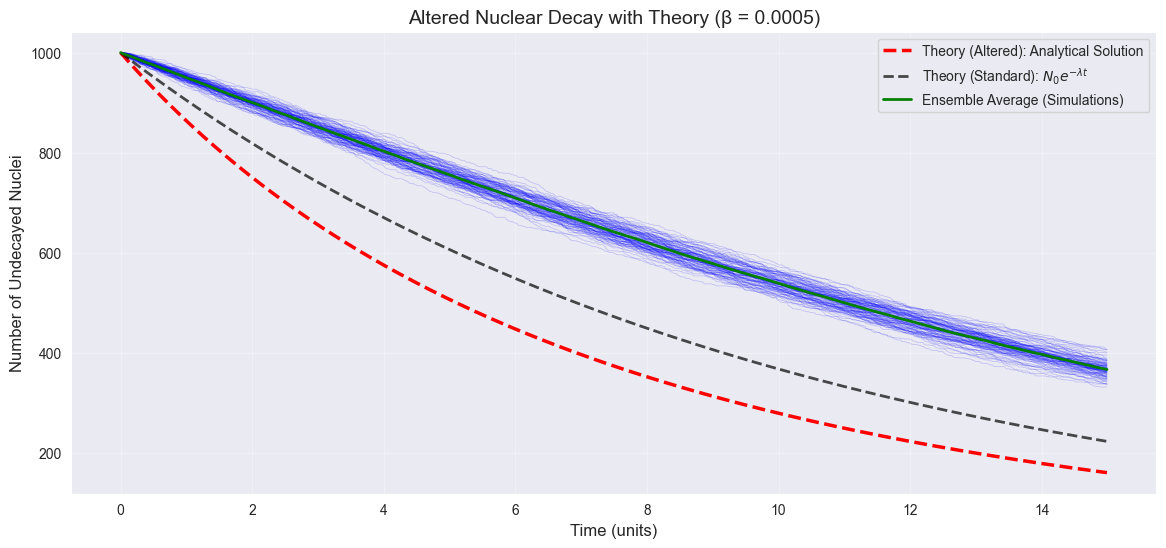

Final values at t=15.0:
Simulation average: 367.0
Theoretical (altered): 160.9
Theoretical (standard): 223.4
Difference from standard: 143.6 nuclei


In [72]:
# Altered Nuclear Decay Parameters
N0 = 1000       # Initial number of nuclei
lam = 0.1       # Base decay constant
beta = 0.0005  # Interaction parameter (must keep beta*N0 < 1)
dt = 0.01       # Small time step for accuracy (reduced from 0.5)
Tdt = 1500      # More time steps to see the full decay
M = 100         # Number of simulations
# N0 = 10000  # Initial number of nuclei
# lam = 0.5  # Decay constant (1/time units)
# dt = 0.05  # Time step for simulation
# Tdt = 300  # Number of time steps
# M = 100
# Initialize array for altered decay
B = np.zeros((M, Tdt), dtype=np.int16)
for i in range(M):
    B[i][0] = N0

# Run altered decay simulation with your original code format
for i in range(M):
    for j in range(1, Tdt):
        tmp = 0
        for k in range(B[i][j - 1]):
            if rng() < dt * lam * (1 - beta * B[i][j - 1]):
                tmp += 1
        B[i][j] = B[i][j - 1] - tmp

# Time array for plotting
t = np.arange(0, Tdt * dt, dt)

# Calculate theoretical approximation for altered decay
# For small beta, we can use perturbation theory or solve the logistic-like equation
# The solution to dN/dt = -λN(1 - βN) is:
# <M^2> == <M>^2
# N(t) = N0 * exp(-λt) / (1 + β*N0*(1 - exp(-λt)))
N_theory_altered = N0 * np.exp(-lam * t) / (1 + beta * N0 * (1 - np.exp(-lam * t)))

# For comparison, standard exponential decay
N_theory_standard = N0 * np.exp(-lam * t)

# Plot with theoretical curve
plt.figure(figsize=(14, 6))
for i in range(M):
    plt.plot(t, B[i], alpha=0.2, color='blue', linewidth=0.5)

# Add theoretical curves
plt.plot(t, N_theory_altered, 'r--', linewidth=2.5, label='Theory (Altered): Analytical Solution')
plt.plot(t, N_theory_standard, 'k--', linewidth=2, label='Theory (Standard): $N_0 e^{-\\lambda t}$', alpha=0.7)

# Calculate and plot ensemble average
mean_B = np.mean(B, axis=0)
plt.plot(t, mean_B, 'g-', linewidth=2, label='Ensemble Average (Simulations)')

plt.xlabel('Time (units)', fontsize=12)
plt.ylabel('Number of Undecayed Nuclei', fontsize=12)
plt.title(f'Altered Nuclear Decay with Theory (β = {beta})', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.show()

# Print comparison statistics
print(f"Final values at t={t[-1]:.1f}:")
print(f"Simulation average: {mean_B[-1]:.1f}")
print(f"Theoretical (altered): {N_theory_altered[-1]:.1f}")
print(f"Theoretical (standard): {N_theory_standard[-1]:.1f}")
print(f"Difference from standard: {mean_B[-1] - N_theory_standard[-1]:.1f} nuclei")

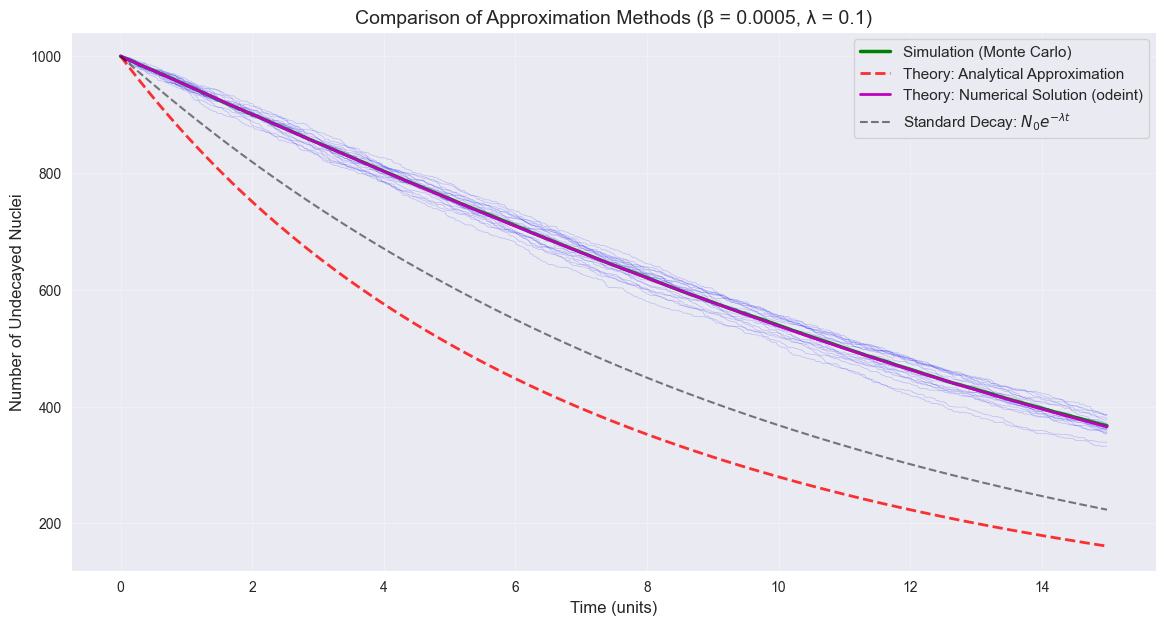

COMPARISON OF APPROXIMATION METHODS

Parameters: N₀ = 1000, λ = 0.1, β = 0.0005
Note: β·N₀ = 0.500 (when this is small, analytical approximation works well)

----------------------------------------------------------------------
Time     Simulation   Analytical   Numerical    Error(Ana)   Error(Num)  
----------------------------------------------------------------------
t=3.8    815.2        594.4        814.7        220.88       0.57        
t=7.5    641.9        373.8        641.6        268.11       0.23        
t=11.2   490.7        242.7        490.2        248.04       0.57        
t=15.0   367.0        160.9        365.1        206.11       1.84        
----------------------------------------------------------------------

Average Relative Errors (for N > 10):
  Analytical approximation: 37.53%
  Numerical solution:       0.12%

CONCLUSION:
  • The analytical formula is a useful approximation for very small β
  • Numerical methods (like odeint) provide more accurate solutions


In [73]:
# ### Better Approximation Using Numerical Methods
#
# The analytical formula we used above is an approximation that works well for very small β.
# However, when β is larger, we need numerical methods to solve the differential equation accurately.
# Next week, you'll learn about these numerical integration techniques in detail.

from scipy.integrate import odeint


# Define the differential equation for altered decay
# dN/dt = -λN(1 - βN)
def altered_decay_equation(N, t, lam, beta):
    """
    Differential equation for altered nuclear decay.
    The decay rate is modified by the factor (1 - βN),
    representing interaction effects.
    """
    return -lam * N * (1 - beta * N)


# Solve the differential equation numerically using odeint
# This is more accurate than the analytical approximation for larger β values
N_theory_numerical = odeint(altered_decay_equation, N0, t, args=(lam, beta)).flatten()

# Create comparison plot
plt.figure(figsize=(14, 7))

# Plot simulation results (same as before)
for i in range(min(20, M)):  # Plot only 20 traces for clarity
    plt.plot(t, B[i], alpha=0.2, color='blue', linewidth=0.5)

# Plot all three approaches
plt.plot(t, mean_B, 'g-', linewidth=2.5, label='Simulation (Monte Carlo)')
plt.plot(t, N_theory_altered, 'r--', linewidth=2, label='Theory: Analytical Approximation', alpha=0.8)
plt.plot(t, N_theory_numerical, 'm-', linewidth=2, label='Theory: Numerical Solution (odeint)')
plt.plot(t, N_theory_standard, 'k--', linewidth=1.5, label='Standard Decay: $N_0 e^{-\\lambda t}$', alpha=0.5)

plt.xlabel('Time (units)', fontsize=12)
plt.ylabel('Number of Undecayed Nuclei', fontsize=12)
plt.title(f'Comparison of Approximation Methods (β = {beta}, λ = {lam})', fontsize=14)
plt.legend(loc='upper right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

# Calculate errors at different time points
time_points = [t[len(t) // 4], t[len(t) // 2], t[3 * len(t) // 4], t[-1]]
time_indices = [len(t) // 4, len(t) // 2, 3 * len(t) // 4, len(t) - 1]

print("=" * 70)
print("COMPARISON OF APPROXIMATION METHODS")
print("=" * 70)
print(f"\nParameters: N₀ = {N0}, λ = {lam}, β = {beta}")
print(f"Note: β·N₀ = {beta * N0:.3f} (when this is small, analytical approximation works well)")

print("\n" + "-" * 70)
print(f"{'Time':<8} {'Simulation':<12} {'Analytical':<12} {'Numerical':<12} {'Error(Ana)':<12} {'Error(Num)':<12}")
print("-" * 70)

for i, idx in enumerate(time_indices):
    sim_val = mean_B[idx]
    ana_val = N_theory_altered[idx]
    num_val = N_theory_numerical[idx]
    error_ana = abs(sim_val - ana_val)
    error_num = abs(sim_val - num_val)

    print(
        f"t={time_points[i]:<6.1f} {sim_val:<12.1f} {ana_val:<12.1f} {num_val:<12.1f} {error_ana:<12.2f} {error_num:<12.2f}")

print("-" * 70)

# Calculate average relative errors
rel_error_analytical = np.mean(np.abs(mean_B[mean_B > 10] - N_theory_altered[mean_B > 10]) / mean_B[mean_B > 10]) * 100
rel_error_numerical = np.mean(np.abs(mean_B[mean_B > 10] - N_theory_numerical[mean_B > 10]) / mean_B[mean_B > 10]) * 100

print(f"\nAverage Relative Errors (for N > 10):")
print(f"  Analytical approximation: {rel_error_analytical:.2f}%")
print(f"  Numerical solution:       {rel_error_numerical:.2f}%")

print("\n" + "=" * 70)
print("CONCLUSION:")
print("  • The analytical formula is a useful approximation for very small β")
print("  • Numerical methods (like odeint) provide more accurate solutions")
print("  • As you'll learn next week, numerical integration is essential for")
print("    solving complex differential equations that lack closed-form solutions")
print("=" * 70)

## Part 3: The Logistic Map and Bifurcation

### Introduction to Chaos Theory

The logistic map is a discrete-time dynamical system that exhibits fascinating behavior
ranging from stable fixed points to chaos. It's defined by:

$$x_{n+1} = f(x_n, \lambda) = 4\lambda x_n(1 - x_n)$$

where:
- $x_n \in [0,1]$ represents the population at generation $n$
- $\lambda \in [0,1]$ is the growth/control parameter

### Bifurcation Phenomena

As $\lambda$ increases from 0 to 1:

1. **$\lambda < 0.25$**: Population dies out (extinction)
2. **$0.25 < \lambda < 0.75$**: Stable fixed point (equilibrium)
3. **$0.75 < \lambda < 0.862$**: Period-doubling cascade
   - First bifurcation at $\lambda \approx 0.75$
   - Period-2 → Period-4 → Period-8 → ...
4. **$\lambda > 0.862$**: Chaos with windows of periodic behavior

### Mathematical Properties

- **Fixed points**: Solutions where $x^* = f(x^*, \lambda)$
- **Stability**: Determined by $|f'(x^*)| < 1$
- **Feigenbaum constant**: $\delta \approx 4.669$ (universal constant in period-doubling)

In [76]:
# Logistic map function
def f(x, lam):
    """
    Logistic map iteration function
    Maps x in [0,1] to next value based on parameter lambda
    """
    return 4 * lam * x * (1 - x)


# Parameters for bifurcation diagram
L = np.arange(0.01, 1, 0.001)  # Lambda values (finer resolution for better visualization)
x0_values = np.arange(0.01, 1, 0.01)  # Multiple initial conditions
M = 500  # Transient iterations to reach attractor
N = 300  # Points to plot after transient

### Generating the Bifurcation Diagram

To create the bifurcation diagram:
1. For each $\lambda$ value, iterate the map many times to eliminate transients
2. Collect the next several iterations (the attractor)
3. Plot these values to visualize the system's long-term behavior

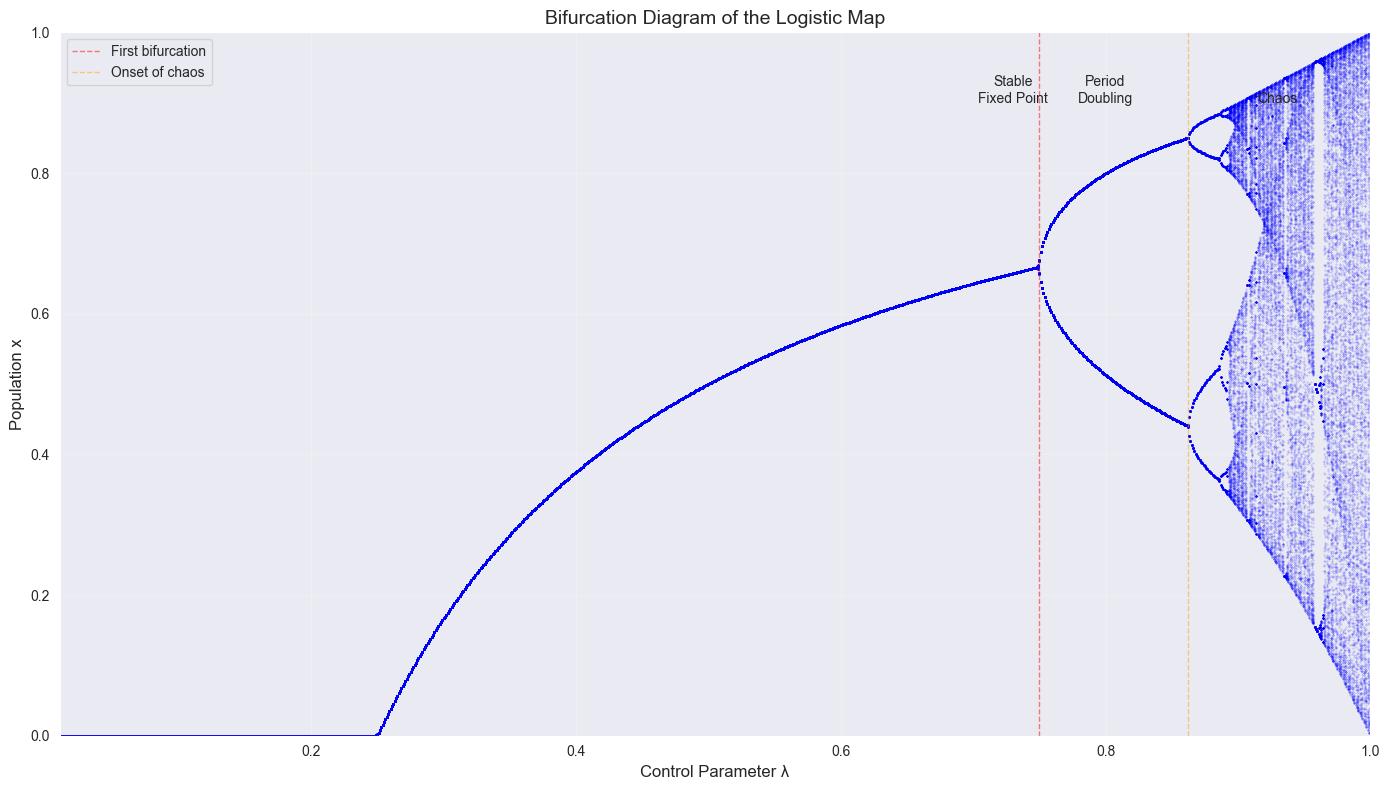

In [78]:
# Generate bifurcation diagram
plt.figure(figsize=(14, 8))

for lam_idx, lam_val in enumerate(L):
    # Use a single initial condition
    x = 0.5

    # Iterate to eliminate transients
    for _ in range(M):
        x = f(x, lam_val)

    # Collect attractor points
    attractor = []
    for _ in range(N):
        x = f(x, lam_val)
        attractor.append(x)

    # Plot attractor points
    plt.scatter([lam_val] * len(attractor), attractor, s=0.1, c='blue', alpha=0.3)

# Add theoretical bifurcation points
plt.axvline(x=0.75, color='red', linestyle='--', alpha=0.5, linewidth=1,
            label='First bifurcation')
plt.axvline(x=0.862, color='orange', linestyle='--', alpha=0.5, linewidth=1,
            label='Onset of chaos')

plt.xlabel('Control Parameter λ', fontsize=12)
plt.ylabel('Population x', fontsize=12)
plt.title('Bifurcation Diagram of the Logistic Map', fontsize=14)
plt.xlim(0.01, 1.0)
plt.ylim(0, 1)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.2)

# Add text annotations for different regimes
plt.text(0.73, 0.9, 'Stable\nFixed Point', fontsize=10, ha='center')
plt.text(0.80, 0.9, 'Period\nDoubling', fontsize=10, ha='center')
plt.text(0.93, 0.9, 'Chaos', fontsize=10, ha='center')

plt.tight_layout()
plt.show()

### Detailed Analysis at Specific λ Values

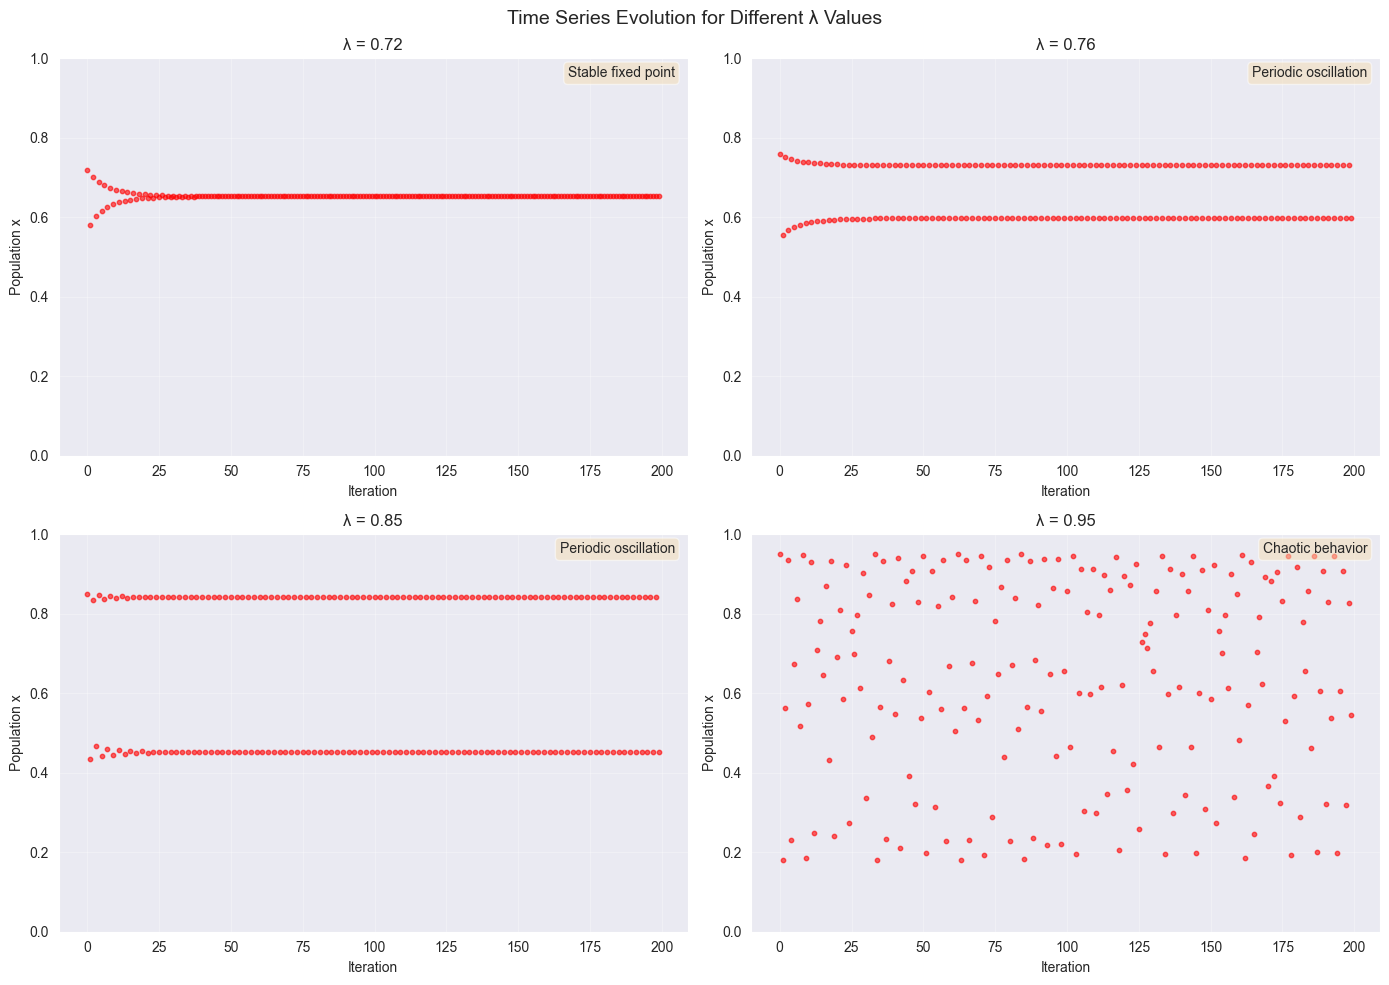

In [79]:
# Analyze behavior at specific lambda values
lambda_values = [0.72, 0.76, 0.85, 0.95]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, lam_val in enumerate(lambda_values):
    x = 0.5
    trajectory = []

    # Generate time series
    for _ in range(200):
        x = f(x, lam_val)
        trajectory.append(x)

    # Plot time series as scatter plot only
    axes[idx].scatter(range(len(trajectory)), trajectory, s=10, c='red', alpha=0.6)
    axes[idx].set_xlabel('Iteration', fontsize=10)
    axes[idx].set_ylabel('Population x', fontsize=10)
    axes[idx].set_title(f'λ = {lam_val:.2f}', fontsize=12)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_ylim(0, 1)

    # Add description
    if lam_val < 0.75:
        behavior = "Stable fixed point"
    elif lam_val < 0.862:
        behavior = "Periodic oscillation"
    else:
        behavior = "Chaotic behavior"

    axes[idx].text(0.98, 0.98, behavior, transform=axes[idx].transAxes,
                   fontsize=10, ha='right', va='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('Time Series Evolution for Different λ Values', fontsize=14)
plt.tight_layout()
plt.show()

## Summary and Conclusions

### Key Observations:

1. **Nuclear Decay**:
   - Stochastic simulations converge to theoretical exponential decay
   - Statistical fluctuations scale as $\sqrt{N}$
   - Ensemble averaging reveals underlying deterministic law

2. **Altered Decay**:
   - Interaction effects modify decay rate
   - System shows deviation from pure exponential behavior
   - Demonstrates importance of collective effects in many-body systems

3. **Logistic Map**:
   - Simple nonlinear equation produces complex dynamics
   - Period-doubling route to chaos is universal
   - Demonstrates sensitivity to initial conditions in chaotic regime

### Physical Significance:

These models illustrate fundamental concepts in:
- **Statistical mechanics** (ensemble averages, fluctuations)
- **Nonlinear dynamics** (bifurcations, chaos)
- **Stochastic processes** (Monte Carlo methods)
- **Complex systems** (emergence, universality)